In [41]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import torch.nn as nn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from collections import OrderedDict
import torch.optim as optim
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import IPython
import IPython.display
import datetime
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM
from keras.optimizers import Adam

In [42]:
df = pd.DataFrame(pd.read_csv('annual_generation_WA.csv'))
#df.pop("Solar Thermal and Photovoltaic")
df

,Hydroelectric Conventional,Solar Thermal and Photovoltaic,Wind,Wood and Wood Derived Fuels,Coal,Petroleum,Natural Gas,Nuclear,Pumped Storage,Other Gases,Other Biomass,Other,Total
0,8.746671e+07,0.0,0.0,1122771.00,7390279.00,42981.00,288058.00,5742027.0,0.0,8460.00,6499.00,3750.00,1.020715e+08
1,8.934240e+07,0.0,0.0,717827.00,7944779.00,31164.00,460424.00,4229868.0,0.0,97467.00,46633.00,3.00,1.028706e+08
2,6.832466e+07,0.0,0.0,1100901.00,9658148.00,25745.00,1273763.00,5692379.0,0.0,234023.00,172810.00,1.00,8.648243e+07
3,6.731238e+07,0.0,0.0,1018120.00,8835079.00,59434.00,3197945.00,7134966.0,0.0,222852.00,214990.00,7.00,8.799578e+07
4,6.557549e+07,0.0,0.0,1018660.00,9831332.00,45419.00,4820582.00,6739749.0,0.0,299161.00,224804.00,31282.00,8.858648e+07
5,8.250015e+07,0.0,0.0,1035788.00,5902945.00,178915.00,4889604.00,6941878.0,0.0,550836.00,197288.00,179.00,1.021976e+08
6,9.851786e+07,0.0,0.0,1121105.00,8067127.00,187236.00,4707267.00,5588000.0,0.0,300221.00,167369.00,1952.00,1.186581e+08
7,1.041706e+08,0.0,0.0,1017734.00,6990519.00,228589.00,2961661.00,6244135.0,0.0,290495.00,222483.00,0.00,1.221262e+08
8,7.981465e+07,0.0,0.0,1120311.00,9312205.00,87043.00,4346349.00,6916065.0,0.0,348881.00,211461.00,1541.00,1.021585e+08
9,9.698938e+07,0.0,0.0,1129311.00,8692479.00,51495.00,3707237.00,6085893.0,0.0,221354.00,206823.00,44.00,1.170840e+08


In [43]:
df_testing = df.Total
df_testing

0     1.020715e+08
1     1.028706e+08
2     8.648243e+07
3     8.799578e+07
4     8.858648e+07
5     1.021976e+08
6     1.186581e+08
7     1.221262e+08
8     1.021585e+08
9     1.170840e+08
10    1.082369e+08
11    8.304867e+07
12    1.027650e+08
13    1.000947e+08
14    1.021651e+08
15    1.019658e+08
16    1.082032e+08
17    1.069902e+08
18    1.108285e+08
19    1.044701e+08
20    1.034727e+08
21    1.152626e+08
22    1.168355e+08
23    1.141729e+08
24    1.163344e+08
25    1.092875e+08
26    1.140866e+08
27    1.159121e+08
28    1.167567e+08
29    1.064636e+08
30    1.161145e+08
31    1.108084e+08
Name: Total, dtype: float64

In [44]:
df

,Hydroelectric Conventional,Solar Thermal and Photovoltaic,Wind,Wood and Wood Derived Fuels,Coal,Petroleum,Natural Gas,Nuclear,Pumped Storage,Other Gases,Other Biomass,Other,Total
0,8.746671e+07,0.0,0.0,1122771.00,7390279.00,42981.00,288058.00,5742027.0,0.0,8460.00,6499.00,3750.00,1.020715e+08
1,8.934240e+07,0.0,0.0,717827.00,7944779.00,31164.00,460424.00,4229868.0,0.0,97467.00,46633.00,3.00,1.028706e+08
2,6.832466e+07,0.0,0.0,1100901.00,9658148.00,25745.00,1273763.00,5692379.0,0.0,234023.00,172810.00,1.00,8.648243e+07
3,6.731238e+07,0.0,0.0,1018120.00,8835079.00,59434.00,3197945.00,7134966.0,0.0,222852.00,214990.00,7.00,8.799578e+07
4,6.557549e+07,0.0,0.0,1018660.00,9831332.00,45419.00,4820582.00,6739749.0,0.0,299161.00,224804.00,31282.00,8.858648e+07
5,8.250015e+07,0.0,0.0,1035788.00,5902945.00,178915.00,4889604.00,6941878.0,0.0,550836.00,197288.00,179.00,1.021976e+08
6,9.851786e+07,0.0,0.0,1121105.00,8067127.00,187236.00,4707267.00,5588000.0,0.0,300221.00,167369.00,1952.00,1.186581e+08
7,1.041706e+08,0.0,0.0,1017734.00,6990519.00,228589.00,2961661.00,6244135.0,0.0,290495.00,222483.00,0.00,1.221262e+08
8,7.981465e+07,0.0,0.0,1120311.00,9312205.00,87043.00,4346349.00,6916065.0,0.0,348881.00,211461.00,1541.00,1.021585e+08
9,9.698938e+07,0.0,0.0,1129311.00,8692479.00,51495.00,3707237.00,6085893.0,0.0,221354.00,206823.00,44.00,1.170840e+08


In [45]:
x= np.arange(32) + 1990
y = df.Total.values
x

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [68]:
dfy = df
dfy['Year'] = np.arange(1990,2022)
dfy

,Hydroelectric Conventional,Solar Thermal and Photovoltaic,Wind,Wood and Wood Derived Fuels,Coal,Petroleum,Natural Gas,Nuclear,Pumped Storage,Other Gases,Other Biomass,Other,Total,Year
0,8.746671e+07,0.0,0.0,1122771.00,7390279.00,42981.00,288058.00,5742027.0,0.0,8460.00,6499.00,3750.00,1.020715e+08,1990
1,8.934240e+07,0.0,0.0,717827.00,7944779.00,31164.00,460424.00,4229868.0,0.0,97467.00,46633.00,3.00,1.028706e+08,1991
2,6.832466e+07,0.0,0.0,1100901.00,9658148.00,25745.00,1273763.00,5692379.0,0.0,234023.00,172810.00,1.00,8.648243e+07,1992
3,6.731238e+07,0.0,0.0,1018120.00,8835079.00,59434.00,3197945.00,7134966.0,0.0,222852.00,214990.00,7.00,8.799578e+07,1993
4,6.557549e+07,0.0,0.0,1018660.00,9831332.00,45419.00,4820582.00,6739749.0,0.0,299161.00,224804.00,31282.00,8.858648e+07,1994
5,8.250015e+07,0.0,0.0,1035788.00,5902945.00,178915.00,4889604.00,6941878.0,0.0,550836.00,197288.00,179.00,1.021976e+08,1995
6,9.851786e+07,0.0,0.0,1121105.00,8067127.00,187236.00,4707267.00,5588000.0,0.0,300221.00,167369.00,1952.00,1.186581e+08,1996
7,1.041706e+08,0.0,0.0,1017734.00,6990519.00,228589.00,2961661.00,6244135.0,0.0,290495.00,222483.00,0.00,1.221262e+08,1997
8,7.981465e+07,0.0,0.0,1120311.00,9312205.00,87043.00,4346349.00,6916065.0,0.0,348881.00,211461.00,1541.00,1.021585e+08,1998
9,9.698938e+07,0.0,0.0,1129311.00,8692479.00,51495.00,3707237.00,6085893.0,0.0,221354.00,206823.00,44.00,1.170840e+08,1999


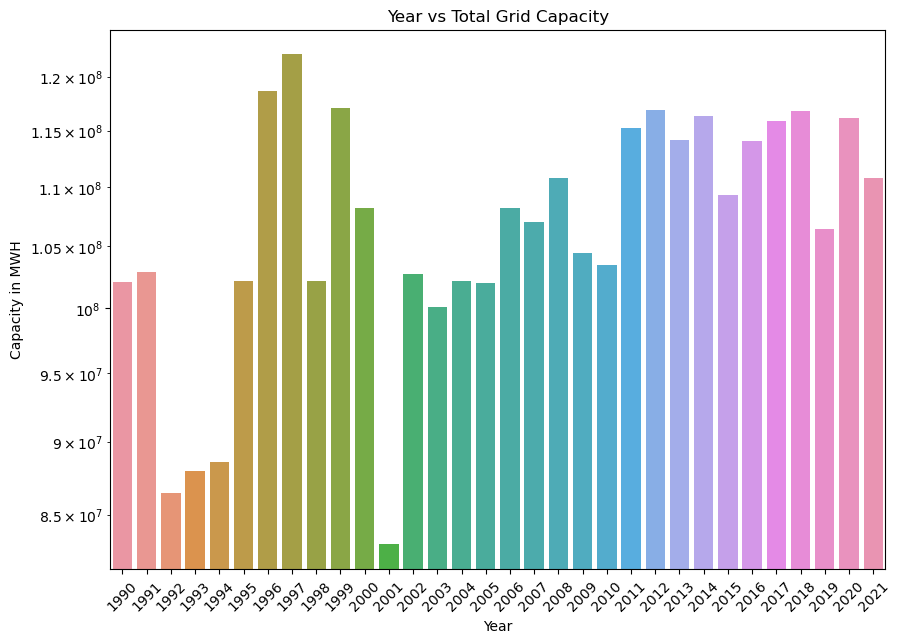

In [77]:
fig=plt.figure(figsize = (10, 7))
bp = sns.barplot(y="Total", x = 'Year',data=df)
bp.set_yscale("log")
plt.title('Year vs Total Grid Capacity')
plt.xlabel('Year')
plt.ylabel('Capacity in MWH')
plt.xticks(rotation=45)
plt.show()


In [47]:
X=x

X=X.reshape(-1,1)
y=y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(X_test)
X_norm = min_max_scaler.transform(X)

In [49]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train) 
xtest = sc_x.transform(X_test)
print (xtrain)

[[ 1.0733894 ]
 [ 0.44689753]
 [-0.28400965]
 [ 0.86455878]
 [-1.11933214]
 [ 0.1336516 ]
 [-0.80608621]
 [ 1.49105065]
 [ 0.96897409]
 [ 0.76014347]
 [-1.53699339]
 [ 1.59546596]
 [-1.01491683]
 [-1.22374745]
 [ 0.23806691]
 [ 1.38663534]
 [ 0.34248222]
 [-0.70167089]
 [-0.91050152]
 [ 1.17780472]
 [-1.32816276]
 [-1.6414087 ]
 [ 0.55131285]
 [-0.07517902]
 [-0.38842496]]


In [50]:
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state = 0)
#classifier.fit(X_train, y_train)
from sklearn import datasets, linear_model, metrics

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score

classifier = linear_model.LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [51]:
classifier.predict(X_train)

array([[1.11943765e+08],
       [1.09473358e+08],
       [1.06591216e+08],
       [1.11120296e+08],
       [1.03297340e+08],
       [1.08238154e+08],
       [1.04532544e+08],
       [1.13590702e+08],
       [1.11532030e+08],
       [1.10708561e+08],
       [1.01650403e+08],
       [1.14002437e+08],
       [1.03709075e+08],
       [1.02885606e+08],
       [1.08649889e+08],
       [1.13178968e+08],
       [1.09061623e+08],
       [1.04944278e+08],
       [1.04120809e+08],
       [1.12355499e+08],
       [1.02473871e+08],
       [1.01238668e+08],
       [1.09885092e+08],
       [1.07414685e+08],
       [1.06179482e+08]])

Text(0, 0.5, 'Capacity in MWH')

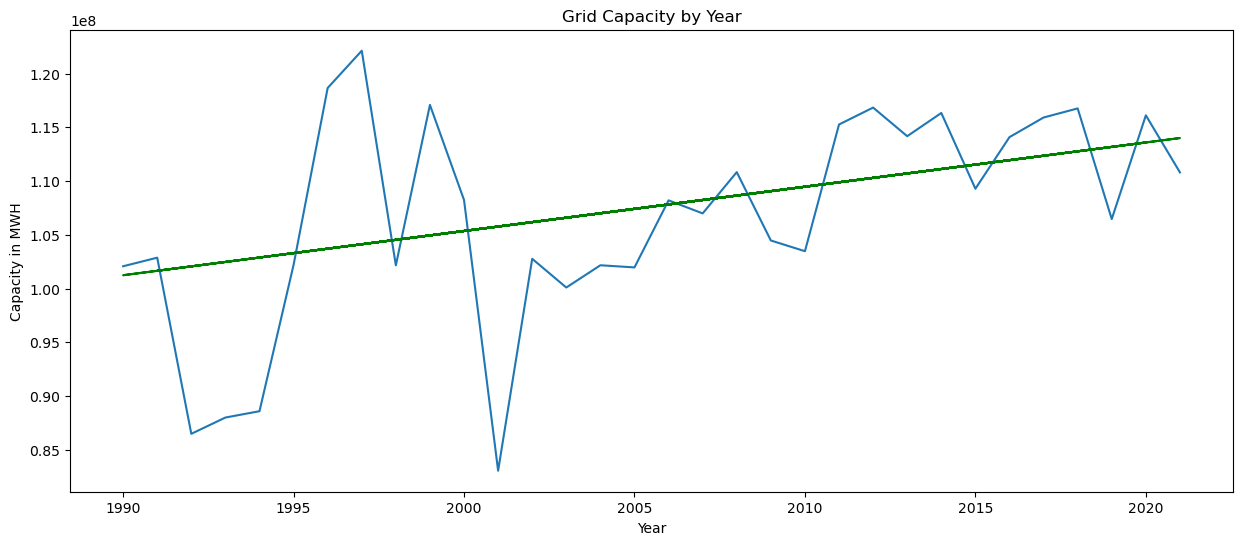

In [62]:
#x=X_train
#y=y_train
n = np.size(x)

y_pred = classifier.predict(X_train)
    
fig=plt.figure(figsize = (15,6))
plt.title('Grid Capacity by Year')
plt.plot(x,y)
plt.plot(X_train, y_pred, color = 'green')
plt.xlabel('Year')
plt.ylabel('Capacity in MWH')

In [55]:
print('Variance score: {}'.format(classifier.score(X_test, y_test)))

Variance score: 0.2324737503981994


In [60]:
# model evaluation
mse=mean_squared_error(y[0:25],y_pred)
  
rmse = np.sqrt(mean_squared_error(y[0:25], y_pred))
r2 = r2_score(y[0:25], y_pred)
  
# printing values
print('Slope:' ,classifier.coef_)
print('Intercept:', classifier.intercept_)
print('MSE:',mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[411734.48055158]]
Intercept: [-7.18112948e+08]
MSE: 136752363646529.45
Root mean squared error:  11694116.625317598
R2 score:  -0.31300122539769526


In [ ]:
#splitting data
#column_indices = {name: i for i, name in enumerate(df.columns)}
n = len(df)
train_df = df[0:int(n*0.8)] 
test_df = df[int(n*0.8):]

num_features = df.shape[-1]
ntrain = len(train_df)
df

In [ ]:
#normalization of data
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std
y_test = test_df
y_train = train_df
X_train = np.arange(25)
X_test = np.arange(26,31)

In [ ]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [ ]:
y_train = torch.tensor(train_df.values.tolist())
y_test = torch.tensor(test_df.values.tolist())
X_train = torch.reshape(torch.tensor(np.arange(25)),(1,25))
X_test = torch.reshape(torch.tensor(np.arange(25,31)),(1,25))

X_train

In [ ]:
torch.reshape(y_train,(1,25))

In [ ]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):

    for epoch in range(1,n_epochs +1):
        
        t_u_train = t_u_train.type(torch.float)
        print(t_u_train)
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train.float(), t_c_train.float())
        t_p_val = model(t_u_val)
    
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 50 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():4f}")

In [ ]:
seq_model = nn.Sequential(
            nn.Linear(25,25),
            nn.Tanh(),
            nn.Linear(25,1))

optimizer = optim.SGD(
    seq_model.parameters(),
    lr = 1e-5)

t_c_train = y_train
t_un_train = X_train
t_c_val = y_test
t_un_val = X_test




training_loop(
    n_epochs = 10,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

In [ ]:
#Initializing the Network
model = Sequential()

model.add(LSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))
model.add(LSTM(128))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
#Compiling the network
model.compile( loss='mean_squared_error',
              optimizer=Adam(lr=0.05, decay=1e-6),
              metrics=['accuracy'] )

#Fitting the data to the model
model.fit(X_train,
         y_train,
          epochs=3,
          validation_data=(X_test, y_test))

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

In [ ]:
pred = model.predict()